In [1]:
# storia più su nns convolutive, capsulenetwork, evoluzione, problemi di classificazione





# usare affnist



# prova minst su affnist e verificare risultati con paper
# testare su dataset normale + rotraslato*2
# clustering per training
# risultato si su db normale sia rototraslato
#
# + provare no shearing


# matrice di confusione normalizzata sia su righe che su colonne (tot 3 matrici)

### Import statements

In [2]:
%%capture

import numpy as np
import tensorflow as tf

#mandatory for correct load and save of files
%cd /Users/paolobonomi/Work/Python/CapsNetwork

# for project class
import sys
sys.path.append("/Users/paolobonomi/Work/Python/CapsNetwork/src")

from setup import Setup # set up model and dataset
import perfu # performance function such as confusion matrix etc...
import printer

### Retrieve model and dataset

In [3]:
train_dataset_type = Setup.d_k[1]
test_dataset_type = Setup.d_k[0]

In [8]:
setup = Setup(train_cfg=train_dataset_type, test_cfg=test_dataset_type, epochs=10)

model = setup.get_model()
epochs = model.get_epochs()

X_train, y_train = setup.get_train_images()
X_test, y_test = setup.get_test_images()
dataset = setup.get_dataset()
testing = setup.get_testing()

Found GPU at: /device:GPU:0
Load Custom affNIST train dataset _v1... 


2022-10-21 09:16:38.718462: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-21 09:16:38.718516: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Load MINST test dataset from keras... 
(10000, 28, 28)
Processing dataset... 
Creating model... 
Loading model... 


2022-10-21 09:16:39.865816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-21 09:16:40.018468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [9]:
printer.pretty_experiment_overview(setup)

The model was trained with 60000 Custom_affNIST images for 10 epochs.
It's going to be tested with 10000 MNIST images.


### Perfomance data

In [10]:
should_create_matrix = True

In [11]:
if should_create_matrix:
    confusionmatrix_test = perfu.get_confusion_mat(model.predict, testing, "test")
    %store confusionmatrix_test
    
    confusionmatrix_train = perfu.get_confusion_mat(model.predict, dataset, "train")
    %store confusionmatrix_train
else:
    %store -r confusionmatrix_train
    %store -r confusionmatrix_test 
    
acc_train = perfu.get_accuracy(perfu.normalize_matrix( confusionmatrix_train, X_train.shape[0]))
acc_test = perfu.get_accuracy(perfu.normalize_matrix( confusionmatrix_test, X_test.shape[0]))

Creating test confusion matrix: 100%|█████████| 157/157 [08:04<00:00,  3.09s/it]


Stored 'confusionmatrix_test' (ndarray)


Creating train confusion matrix: 100%|████████| 938/938 [48:09<00:00,  3.08s/it]

Stored 'confusionmatrix_train' (ndarray)


#### Testing Confusion Table

In [12]:
values, columns, index = perfu.get_confusion_table(confusionmatrix_test, X_test.shape[0])
printer.print_confusion_tables(values, columns, index)

Digit,0,1,2,3,4,5,6,7,8,9
Condition Positive,984,1135,1044,998,993,877,962,1014,993,1000
Condition Negative,9016,8865,8956,9002,9007,9123,9038,8986,9007,9000
True Positive (TN),971,1126,1023,991,963,865,948,997,959,981
False Negative (FN),13,9,21,7,30,12,14,17,34,19
False Positive (FP),9,9,9,19,19,27,10,31,15,28
True Negative (TN),9007,8856,8947,8983,8988,9096,9028,8955,8992,8972
Sensitivity (TPR),0.987,0.992,0.98,0.993,0.97,0.986,0.985,0.983,0.966,0.981
Specificity (TNR),0.999,0.999,0.999,0.998,0.998,0.997,0.999,0.997,0.998,0.997
Positive Predictive Value (PPV),0.991,0.992,0.991,0.981,0.981,0.97,0.99,0.97,0.985,0.972
Negative Predictive Value (NPV),0.999,0.999,0.998,0.999,0.997,0.999,0.998,0.998,0.996,0.998


#### Confusion Matrix -- change print statement

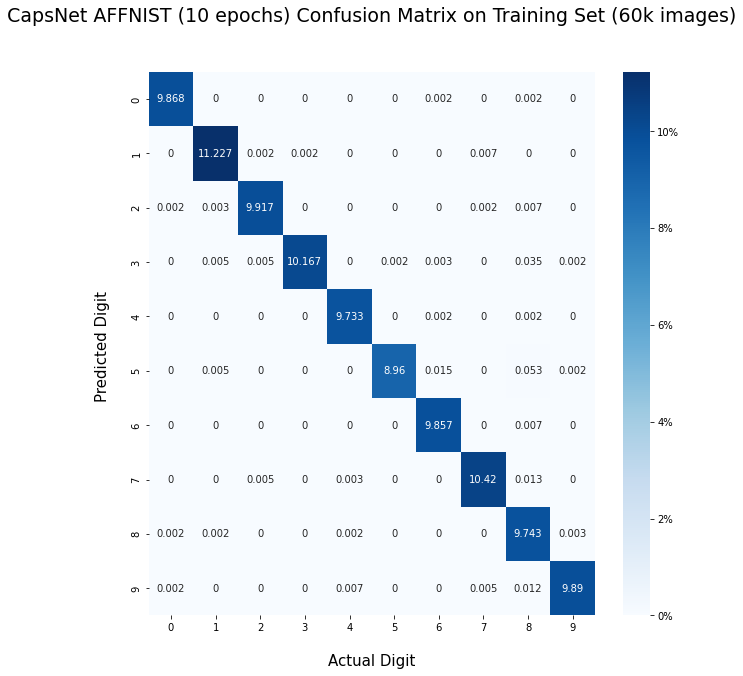

In [13]:
printer.print_matrix(
    np.around(perfu.normalize_matrix( confusionmatrix_train, X_train.shape[0]), decimals=3),
    'CapsNet AFFNIST (10 epochs) Confusion Matrix on Training Set ('+str(int(X_train.shape[0]/1000))+'k images)',
    'Actual Digit',
    'Predicted Digit',
    perfu.headers,
    perfu.headers)

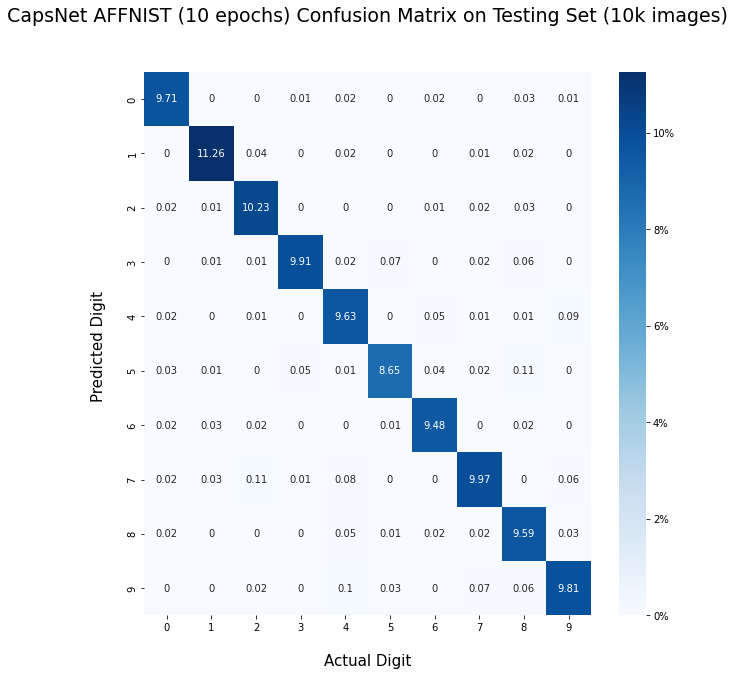

In [14]:
printer.print_matrix(
    np.around(perfu.normalize_matrix( confusionmatrix_test, X_test.shape[0]), decimals=3),
    'CapsNet AFFNIST (10 epochs) Confusion Matrix on Testing Set ('+str(int(X_test.shape[0]/1000))+'k images)',
    'Actual Digit',
    'Predicted Digit',
    perfu.headers,
    perfu.headers)

#### Accuracy

In [15]:
printer.print_accuracy(acc_train, acc_test, X_train.shape[0], X_test.shape[0])

,Accuracy,# Images,Epochs
Train,99.782,60000,10
Test,98.240,10000,10


### Error cases

In [16]:
off = 44
n = 110
idx, pred = perfu.get_error_index(model, X_test[off:off+n], y_test[off:off+n], off)

print(idx)
print(pred)

2022-10-21 10:13:04.134657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[]
[]


In [17]:
for i in range(len(idx)):
    img = idx[i]
    printer.print_image_and_prediction(X_test[img], y_test[img], pred[i], 40 )


### Network Conv1/PrimaryCapsule Output

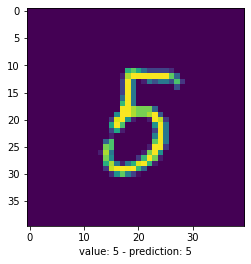

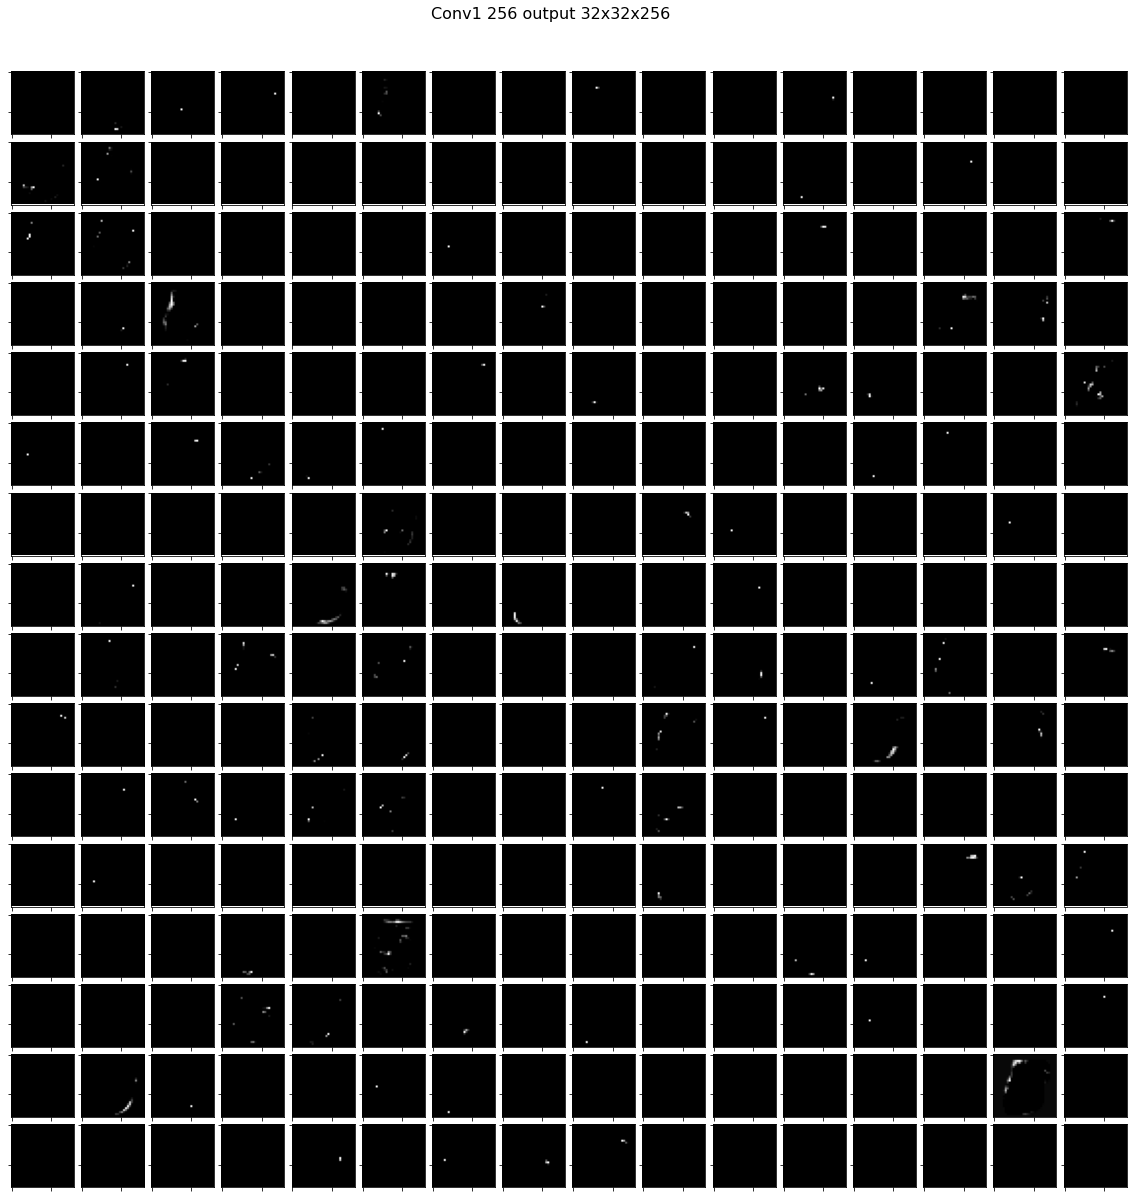

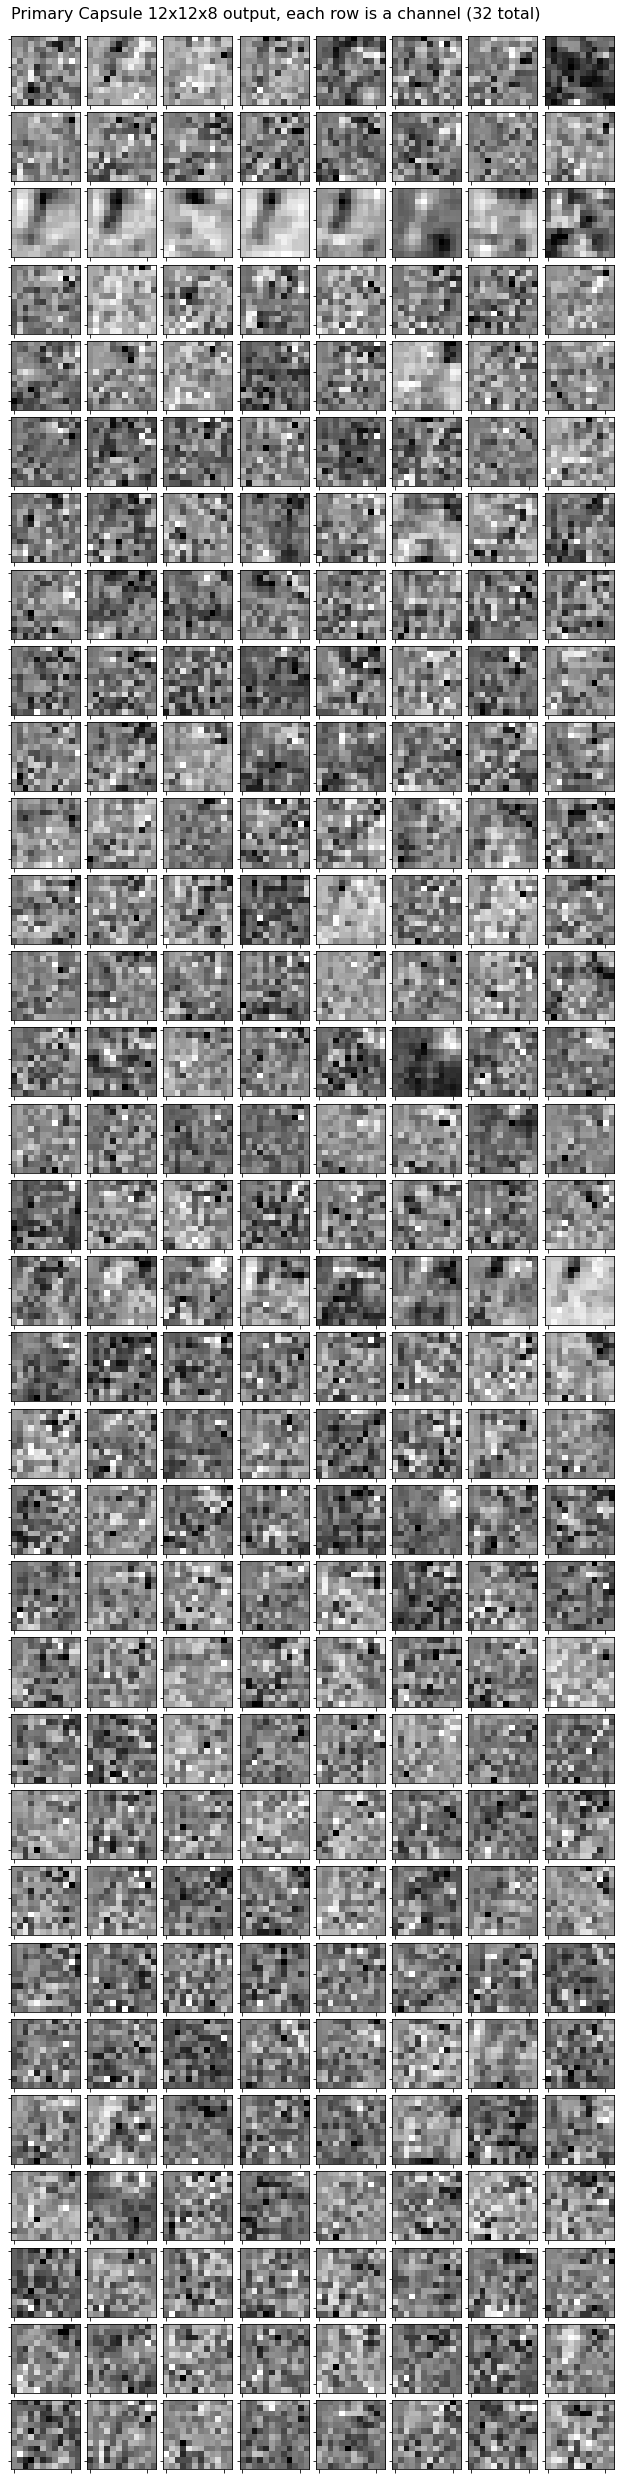

In [18]:
printer.print_network(model, X_test[45], y_test[45], 40)

### Network Kernels

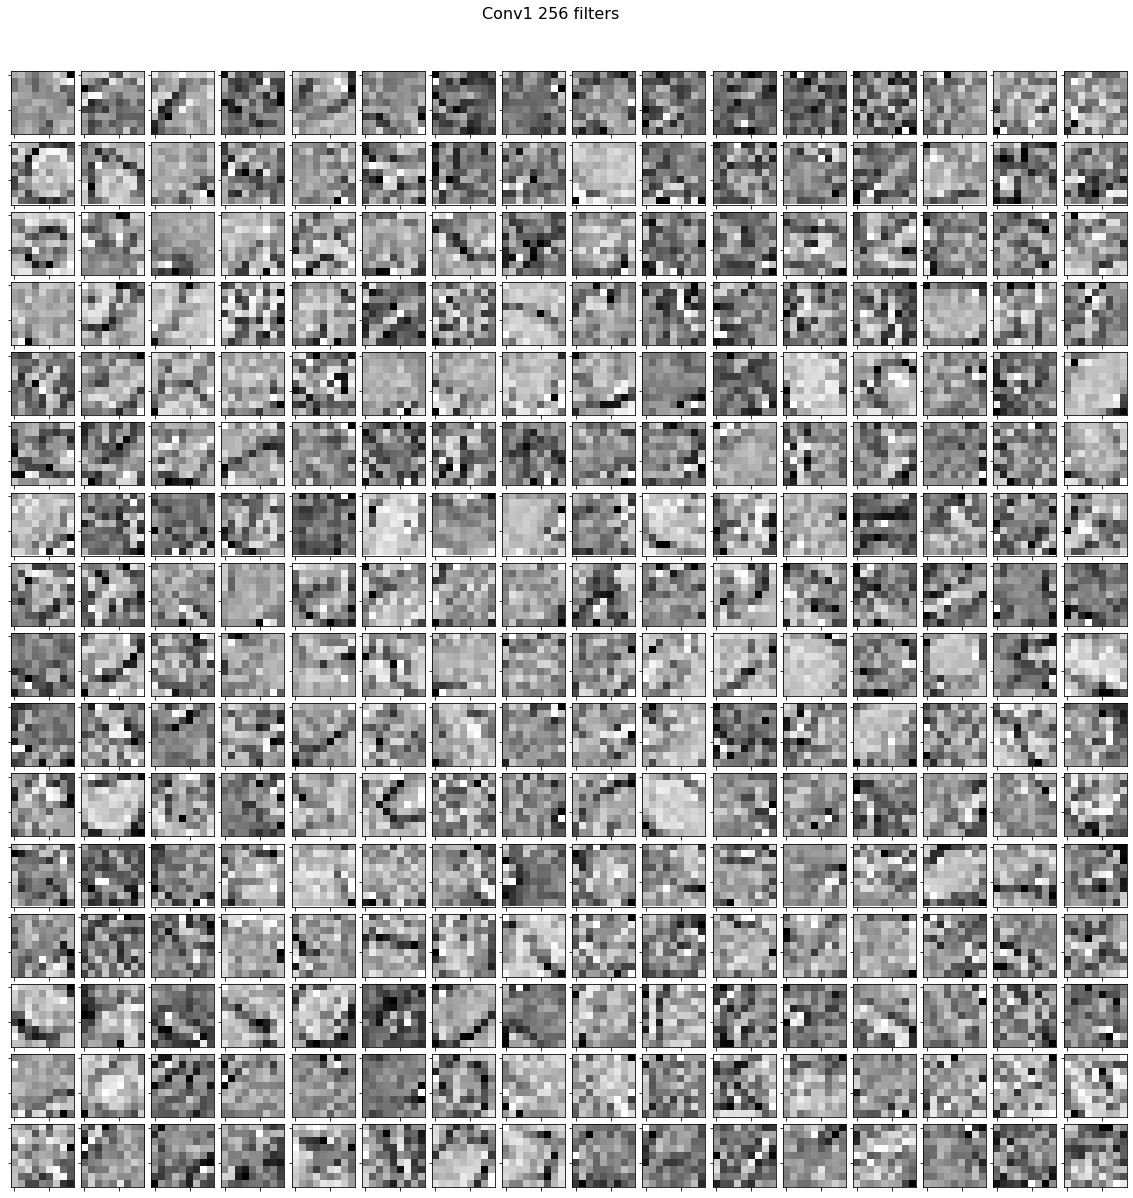

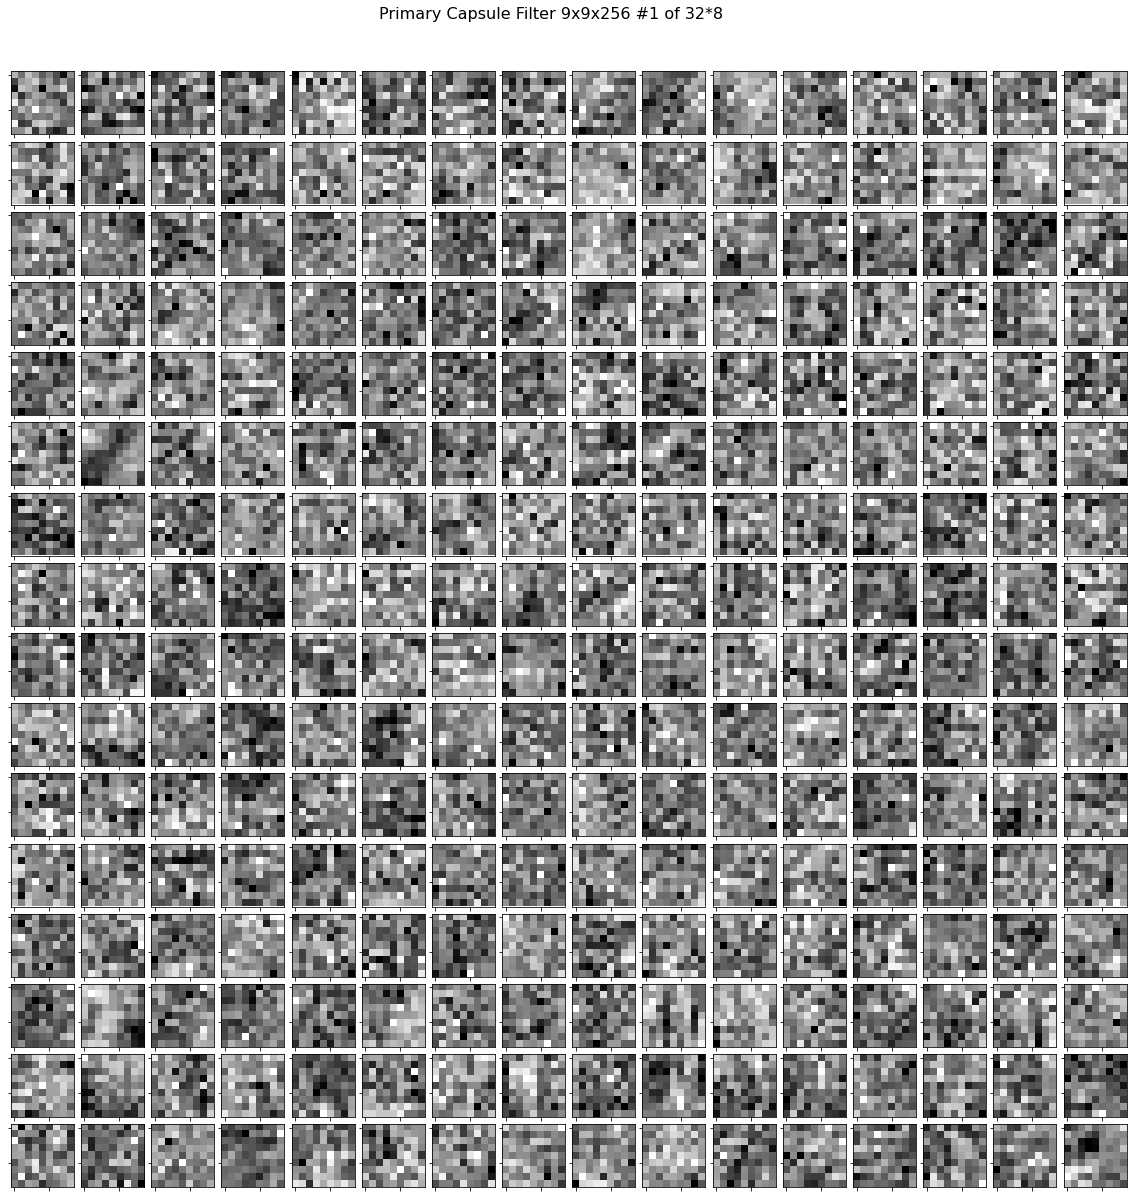

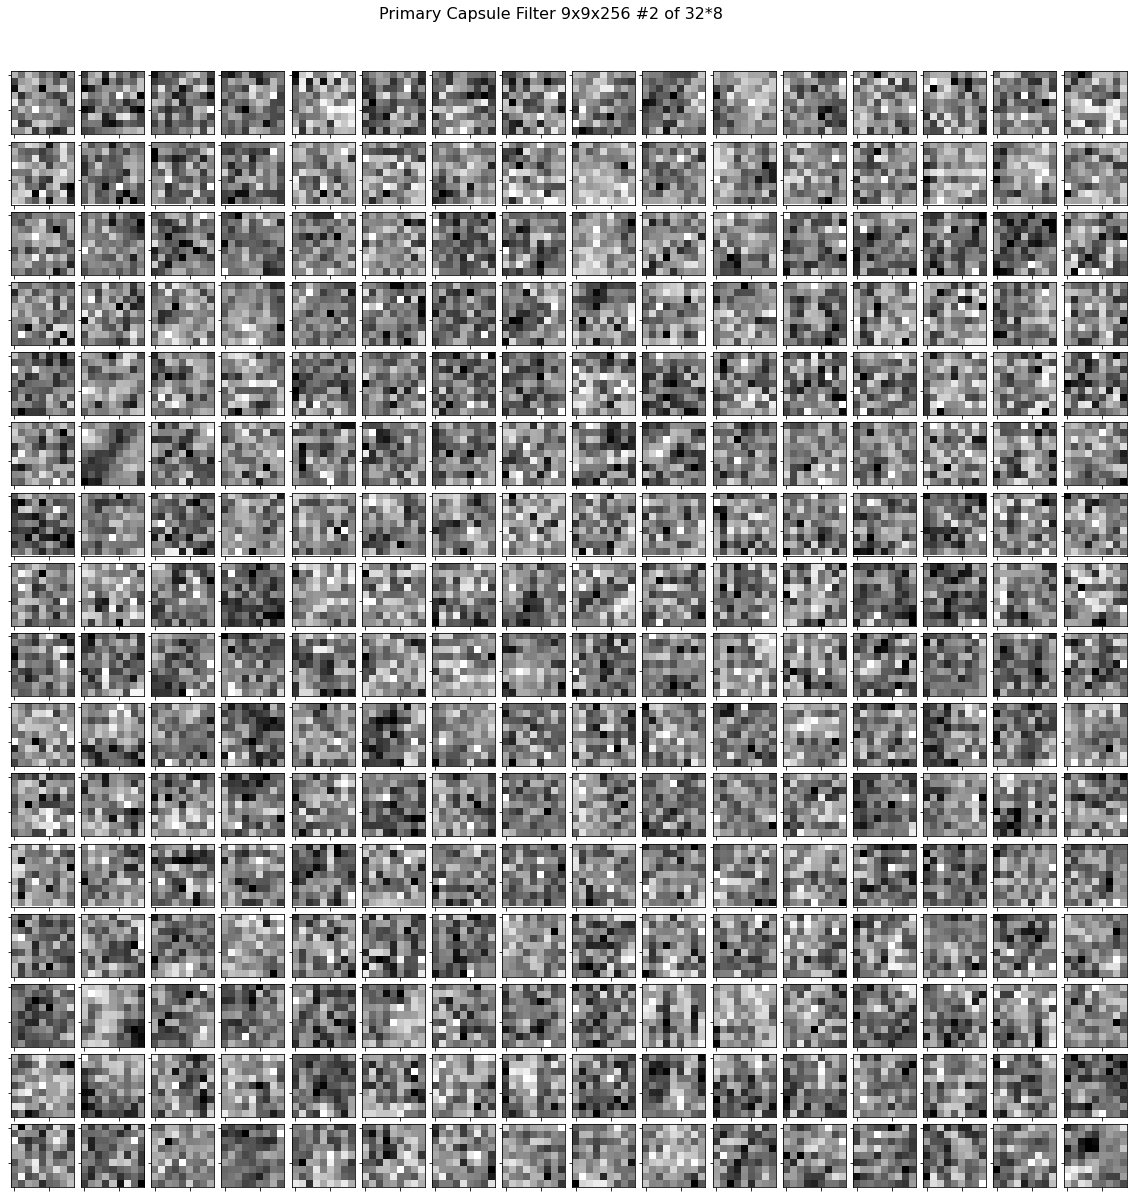

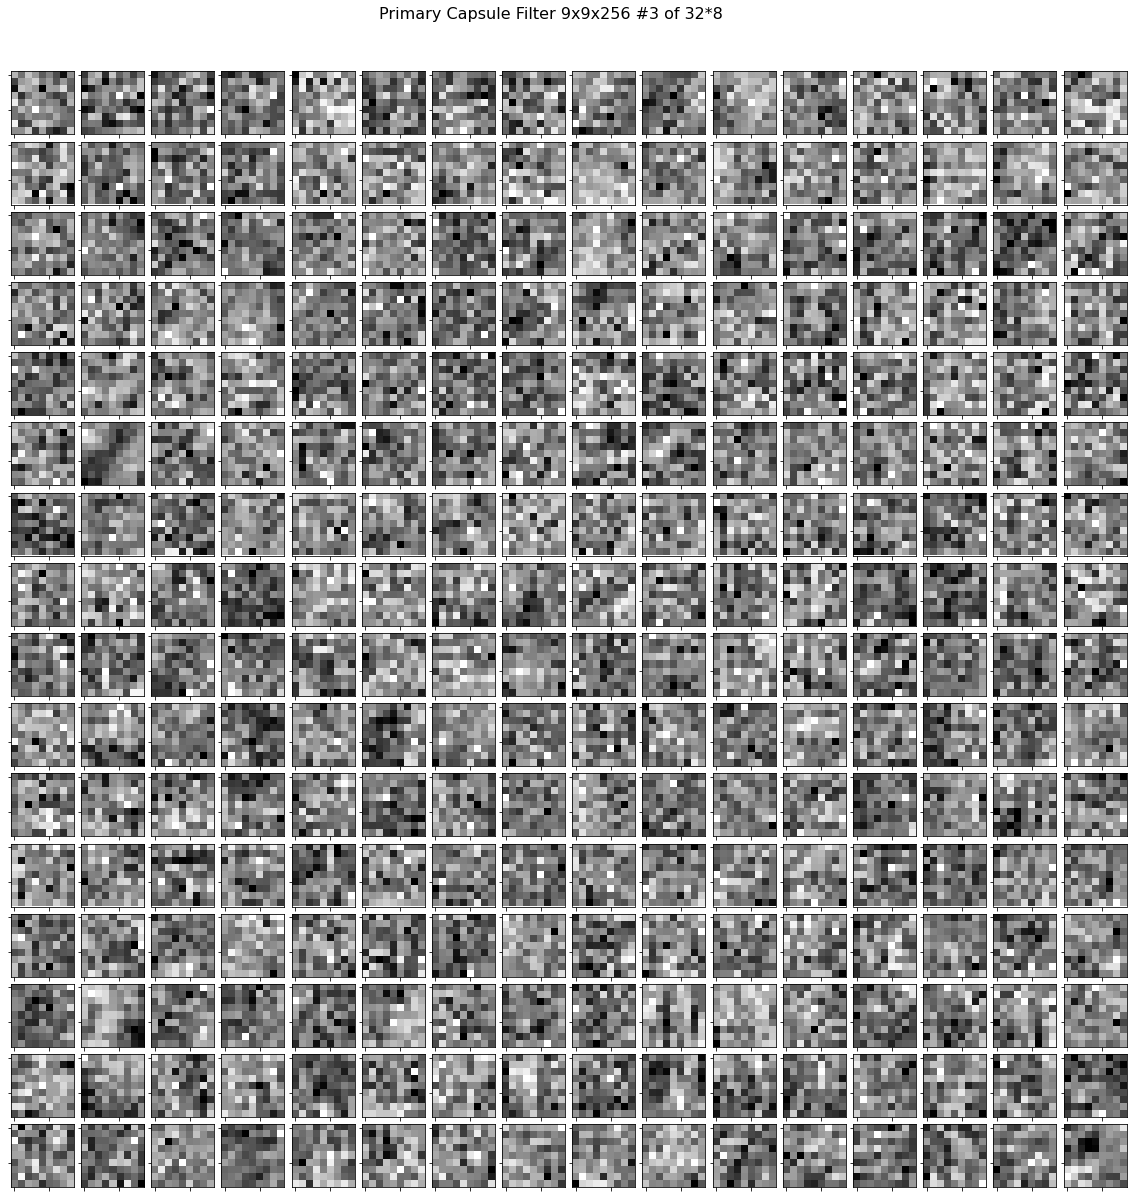

In [19]:
printer.print_fixed_network_params(model)